# Using Haar Cascades (OpenCV)

This requires having run:
 - `./data_scripts/download_lfw_raw.sh`
 - `./data_scripts/flatten_lfw_raw.sh`

In [1]:
import numpy as np
import cv2
import os
import shutil

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Load haar cascade for face detection
# ------------------------------------
face_cascade_name = '../../utils/haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier()
face_cascade.load(face_cascade_name)


# Load image
# ----------

image_directory = '../../data/lfw/'
for filename in os.listdir(image_directory):
    print(filename)
    break
    
image = cv2.imread(os.path.join(image_directory,filename)) # (1080 × 720)
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #RGB
print(image.shape)

Bob_Stoops_0006.jpg
(250, 250, 3)


In [3]:
# Cropping first produces higher resolution output.

# Script options
# --------------
crop_image = True

# Crop
# ----
# Note: Cropping being done to naively remove black borders

if crop_image:
    # Assuming image is divisble by 10!
    crop_length = 60
    #target_size = image.shape[0] - crop_length
    x0 = int((crop_length)/2)
    y0 = int((crop_length)/2)
    x1 = -x0
    y1 = -y0
    cr_image = image[x0:x1, y0:y1]

    print(cr_image.shape)


# Scale
# -----
cifar_10_size = 32
scale_size = cifar_10_size
sm_image = cv2.resize(cr_image, (scale_size,scale_size))
print(sm_image.shape)

(190, 190, 3)
(32, 32, 3)


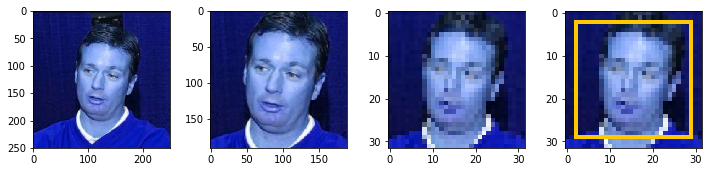

In [4]:
target_image = sm_image.copy()
    
detected_image = target_image.copy()

# Facial detection
# ----------------

faces = face_cascade.detectMultiScale(target_image, 1.1, 2, 0|cv2.CASCADE_SCALE_IMAGE, (5,5))
x,y,w,h  = faces[0]
margin = 0
margin = 1

# Draw bounding box
bb_color = (255,200,0)
cv2.rectangle(detected_image, (x-margin,y-margin), (x+w+margin,y+h+margin), bb_color, thickness=0)

if crop_image:
    
    plt.figure(figsize=(10,10))

    plt.subplot(1,4,1)
    plt.imshow(image)

    plt.subplot(1,4,2)
    plt.imshow(cr_image)

    plt.subplot(1,4,3)
    plt.imshow(sm_image)
    
    plt.subplot(1,4,4)
    plt.imshow(detected_image)

    
else:
    
    plt.figure(figsize=(20,20))

    plt.subplot(1,3,1)
    plt.imshow(image)

    plt.subplot(1,3,2)
    plt.imshow(sm_image)

    plt.subplot(1,3,3)
    plt.imshow(detected_image)
    
plt.tight_layout()

In [ ]:
root='../data/lfw_faces/'
print(os.path.join(root,filename))

In [ ]:
root = '../data/lfw_cropped_scaled/'
if os.path.exists(root):
    shutil.rmtree(root)
os.makedirs(root)


write_path = os.path.join(root,filename)
cv2.imwrite(write_path,sm_image)

In [ ]:
# Load image
# ----------
image = cv2.imread(write_path) # (1080 × 720)
image = cv2.cvtColor(image,0) #RGB
plt.imshow(image)

# Testing script

Bob_Stoops_0006.jpg
(40, 40, 3)


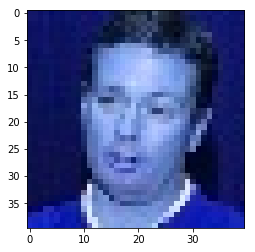

In [4]:
image_directory = '../../data/lfw_cropped_scaled/'
for filename in os.listdir(image_directory):
    print(filename)
    break
    
# Load image
# ----------
image = cv2.imread(os.path.join(image_directory,filename))
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #RGB
print(image.shape)
plt.imshow(image)